In [367]:
import sys
import os
import subprocess
import glob
import fnmatch
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [368]:
# Reading the multiple outputs for each samples from RNA-seqC and concate it as a single dataframe
# Open the dataframe `aggrgate_RNA-seqc.tsv` and then reshape the dataframe
# Log transform the values for each metrices
# Author Alva James, May 2019

In [ ]:
data_frames = []
path = r'/cluster/work/grlab/projects/Projects2019_SOCIBP/alignment/RNA-SeqC/*'
all_files = glob.glob(os.path.join(path, "*.tsv")) 
for filename in all_files:
    name = os.path.basename(os.path.normpath(filename))
    df = pd.DataFrame.from_csv(filename,sep='\t')
    data_frames.append(df)
    merged = pd.concat(data_frames, axis=1)
    #merged.rename(columns=lambda x: x.split('_')[0], inplace=True)
merged_long=pd.DataFrame.transpose(merged)
merged_long.to_csv("/cluster/work/grlab/projects/Projects2019_SOCIBP/alignment/RNA-SeqC/aggrgate_RNA-seqc.tsv",sep='\t',index=True)
merged_long_melt=pd.melt(merged_long.reset_index(), id_vars='index')
merged_long_melt.rename(columns={"index":"samples","Sample":"quality_metrics"},inplace=True)
aggrgate=pd.read_csv("/cluster/work/grlab/projects/Projects2019_SOCIBP/alignment/RNA-SeqC/aggrgate_RNA-seqc.tsv",sep='\t',header=0)
#aggrgate.rename(columns={"Unnamed: 0": "sample"},inplace = True)
merged_long_melt=pd.melt(aggrgate.reset_index(), id_vars='samples')
#merged_long_melt.rename(columns={"index":"samples","Sample":"quality_metrics"},inplace=True)
merged_long_melt['samples'].drop_duplicates().shape
merged_long_melt["log_values"] = merged_long_melt['value'].apply(lambda x: np.log2(x+1))
merged_long_melt =merged_long_melt[merged_long_melt.variable != "index"]

In [ ]:
# Then I categorized the output metrics into three classes:  "relevant", "sec_cat" and "non_revelant"
# In addition to that, I labeled the class based on their values "lower" and "higher"
# The category was based on the : https://github.com/broadinstitute/rnaseqc/blob/master/Metrics.md

In [280]:
relevant_categories=['Mapping Rate','Unique Rate of Mapped', 'Duplicate Rate of Mapped', 
                     'Base Mismatch', 'End 1 & 2 Mapping Rate','Expression Profiling Efficiency',
                     'High Quality Rate', 'Exonic Rate','Intronic Rate','Intergenic Rate','Intragenic Rate','Ambiguous Alignment Rate'
                     'High Quality Exonic, Intronic, Intergenic, Intragenic, and Ambiguous Alignment Rates','rRNA Rate',
                      'Raw Counts','Genes Detected', 'Median Exon CV' ,'Total Bases','End 2 Bases', 'High Quality Intergenic Rate'
                     ]

In [302]:
secound_categories=['End 1 Mapping Rate','End 2 Mapping Rate', 'Duplicate Rate of Mapped'
                     'Reads used for Intron/Exon counts']

In [371]:
merged_long_melt["label"]=np.where(merged_long_melt['variable'].isin(relevant_categories), 'relevant', np.where(merged_long_melt.variable.isin(secound_categories), 'sec_cat','non_revelant'))
merged_long_melt.query('label== "relevant"').drop_duplicates('variable')
merged_long_melt["val"]=np.where(merged_long_melt['log_values']<=23, 'lower', 'higher')


In [369]:
# For example here is how it looks like

In [370]:
merged_long_melt.query('val =="higher"').drop_duplicates('variable')

,samples,variable,value,log_values,label,val
544,JM-2,End 1 Bases,1.869481e+09,30.799991,non_revelant,higher
561,JM-2,End 2 Bases,1.855836e+09,30.789422,relevant,higher
578,JM-2,End 1 Mapped Reads,1.850971e+07,24.141779,non_revelant,higher
595,JM-2,End 2 Mapped Reads,1.837462e+07,24.131211,non_revelant,higher
634,C3N-02671_08,End 2 Mismatches,8.409545e+06,23.003596,non_revelant,higher
714,JM-2,High Quality Reads,3.344468e+07,24.995273,non_revelant,higher
731,JM-2,Intergenic Reads,3.591671e+07,25.098152,non_revelant,higher
850,JM-2,Mapped Reads,3.688433e+07,25.136505,non_revelant,higher
867,JM-2,Mapped Unique Reads,3.688433e+07,25.136505,non_revelant,higher
884,JM-2,Mismatched Bases,9.138832e+06,23.123579,non_revelant,higher


## Visualizing the above dataframe as boxplot

(-1, 35)

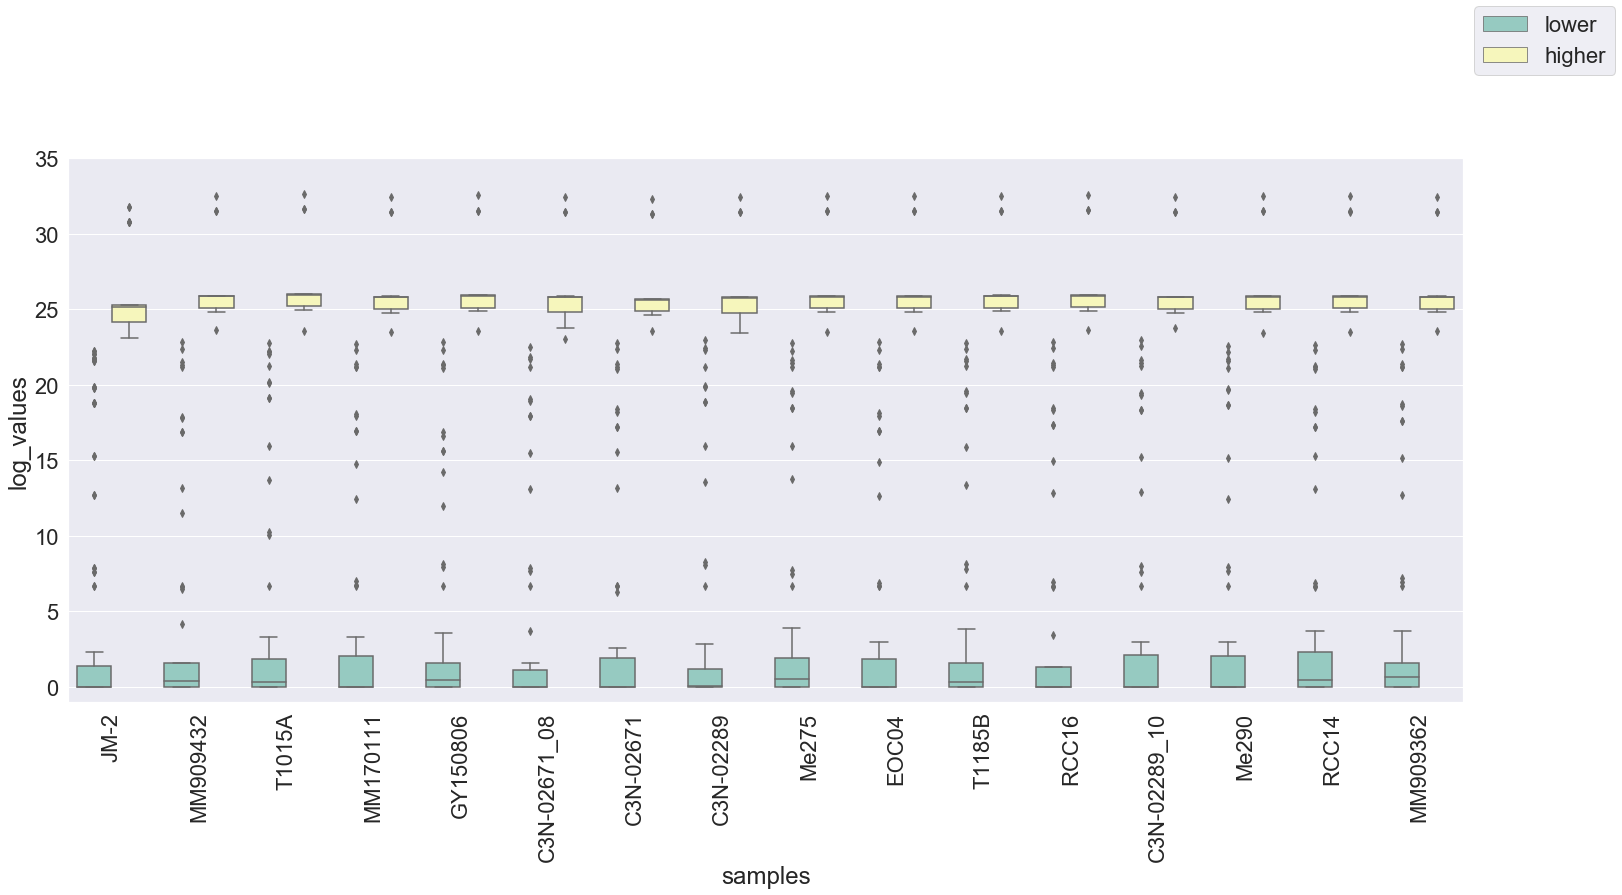

In [354]:
sns.set(rc={'figure.figsize':(25,10)})
sns.set(font_scale=2)
ax=sns.boxplot(x="samples", y="log_values", hue="val",data=merged_long_melt, palette="Set3")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3))
ax.set_xticklabels(ax.get_xticklabels(minor=False), rotation=90)
ax.set_ylim([-1, 35]) 

/Users/alvajames/software/anaconda/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


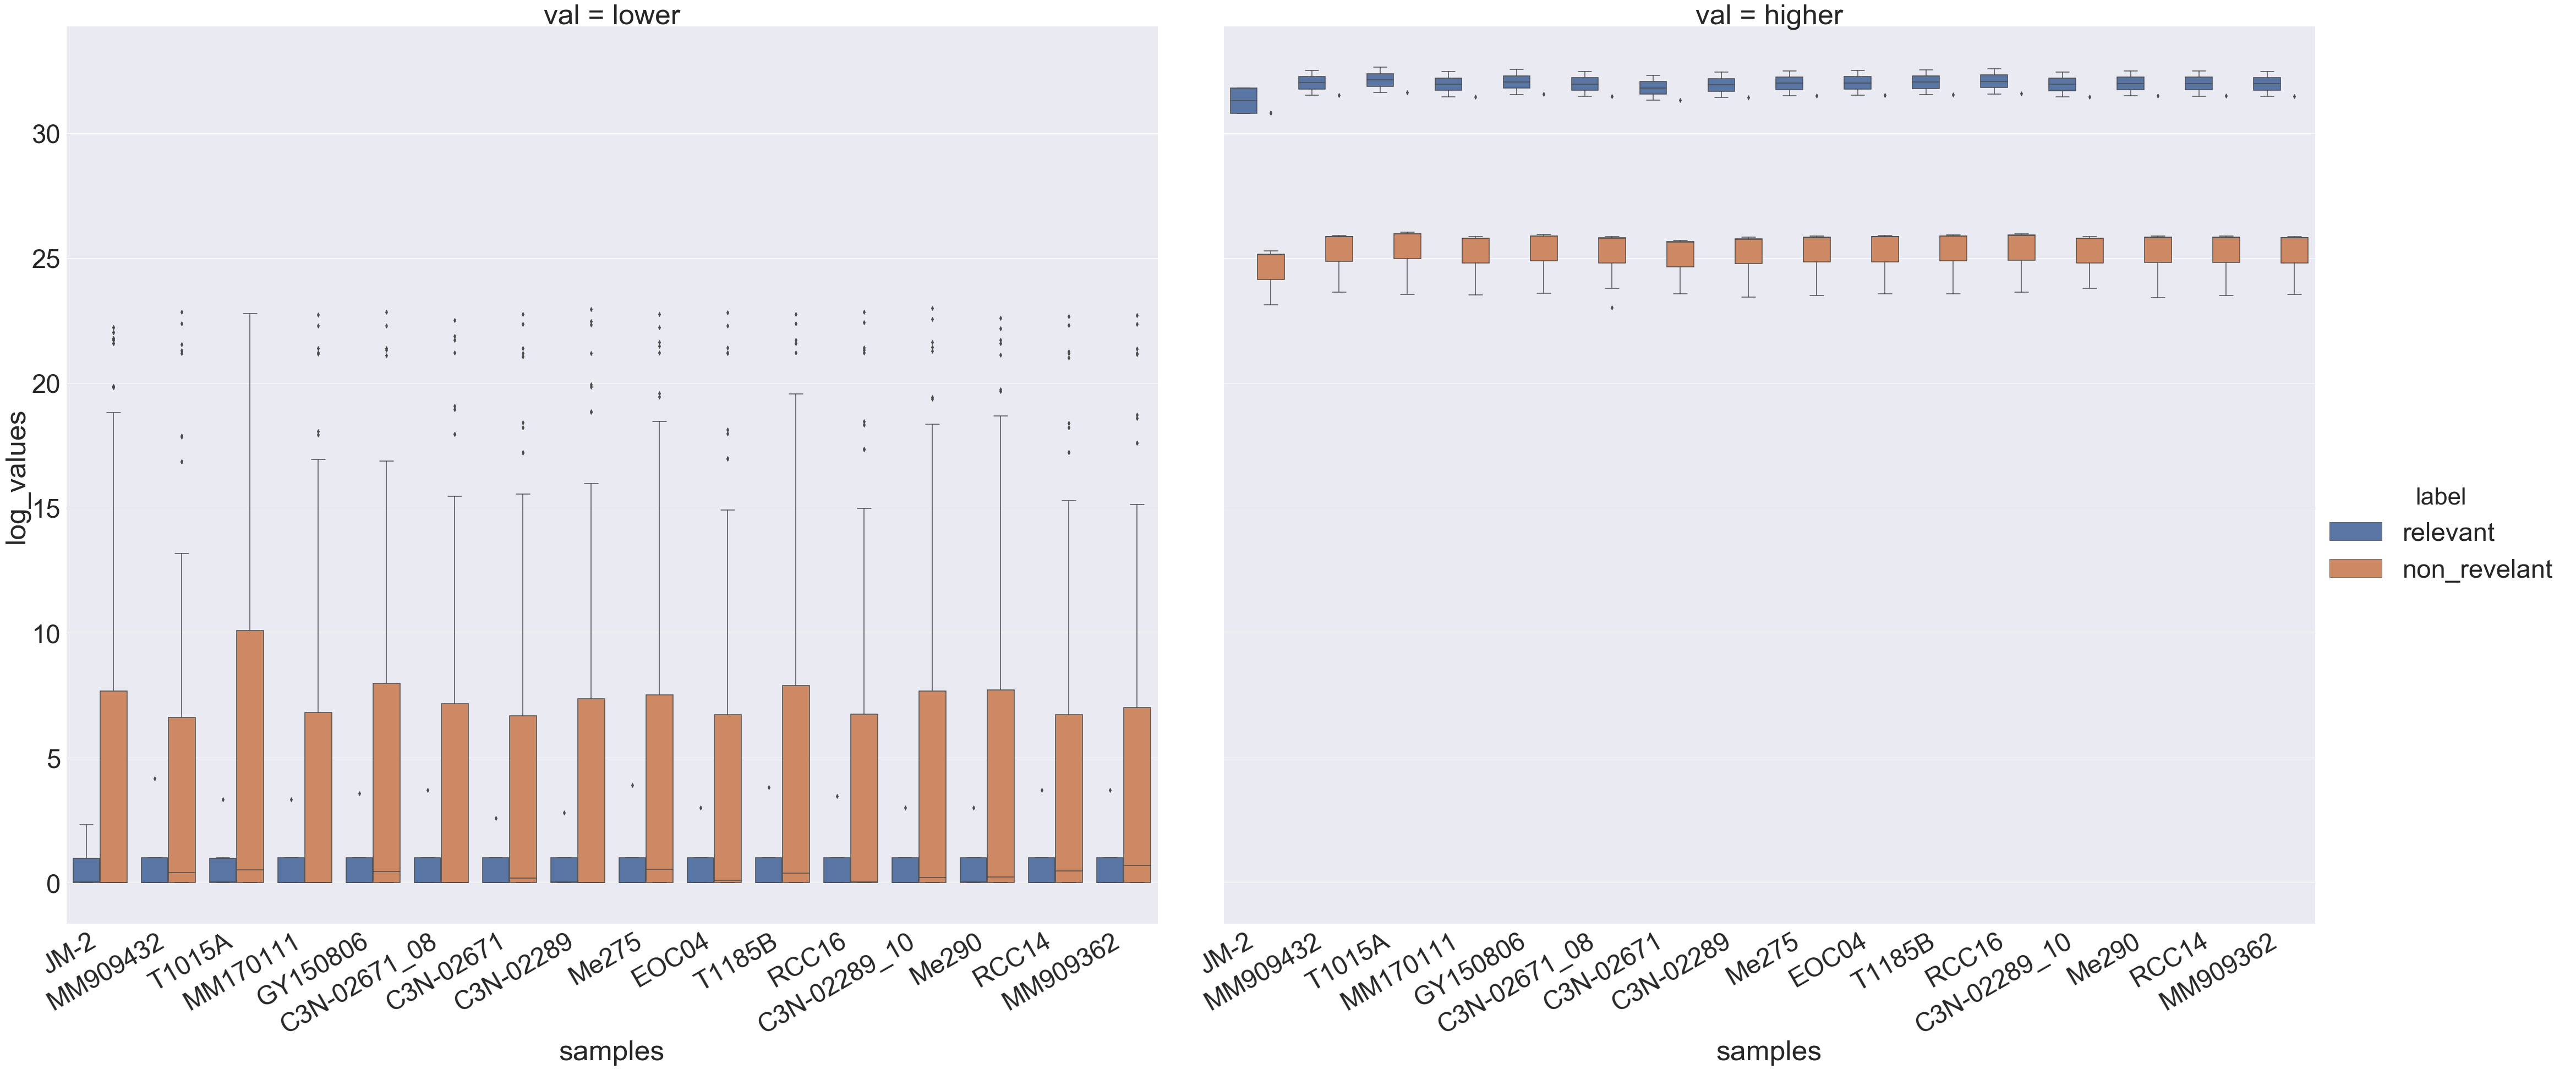

In [364]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set(font_scale=4.3)
ax =sns.catplot(x='samples', y='log_values', hue='label', col="val", kind="box", data=merged_long_melt,height=5, aspect=1,size=30)
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3))
ax.fig.autofmt_xdate()

No handles with labels found to put in legend.


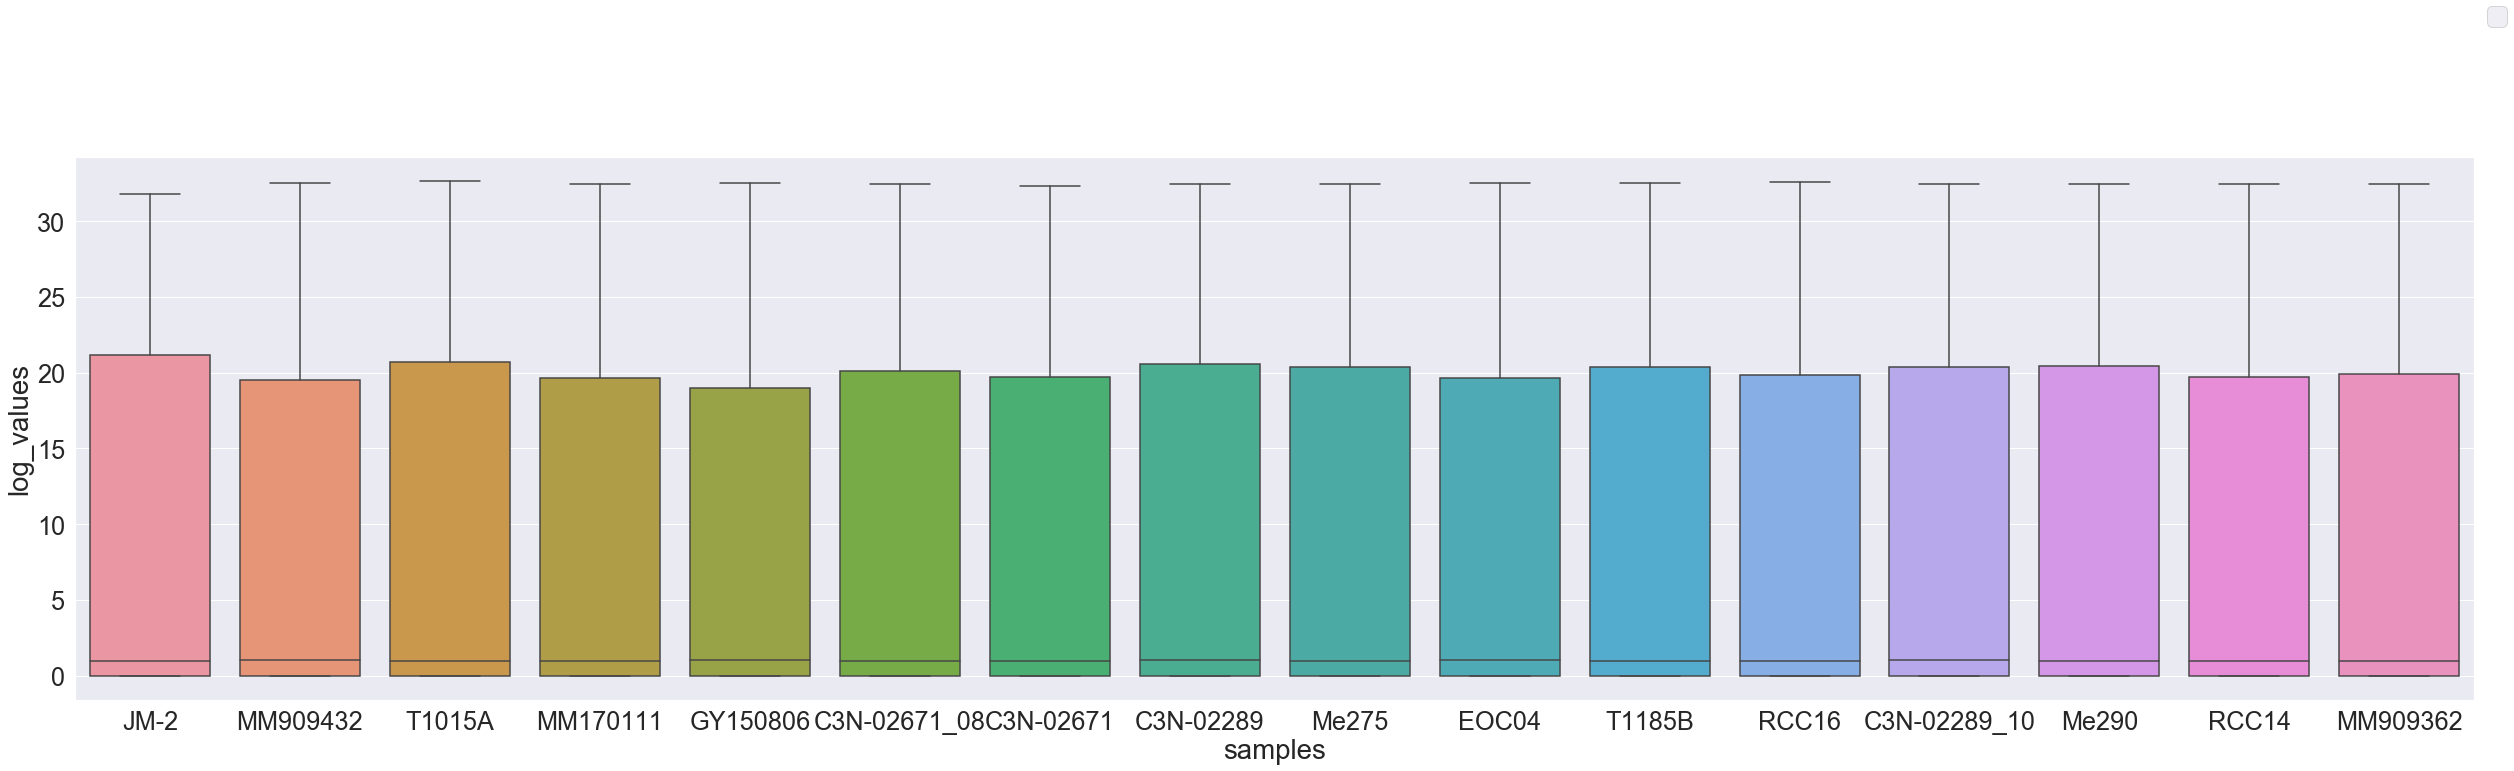

In [372]:
sns.set(rc={'figure.figsize':(43,10)})
#sns.set_context("paper", rc={"font.size":20,"axes.titlesize":10,"axes.labelsize":10}) 
sns.set(font_scale=2.3)
ax = sns.boxplot(x="samples", y="log_values", data=merged_long_melt)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3))
#ax.set_xticklabels(ax.get_xticklabels(minor=False), rotation=30)

In [ ]:
## Visualize as swarmplot with metrics as x axis and the samples as dotes or hue

[Text(0, 0, 'End 1 Bases'),
 Text(0, 0, 'End 2 Bases'),
 Text(0, 0, 'High Quality Reads'),
 Text(0, 0, 'Intergenic Reads'),
 Text(0, 0, 'Mapped Reads'),
 Text(0, 0, 'Mapped Unique Reads'),
 Text(0, 0, 'Reads used for Intron/Exon counts'),
 Text(0, 0, 'Total Bases'),
 Text(0, 0, 'Total Reads'),
 Text(0, 0, 'Unique Mapping, Vendor QC Passed Reads')]

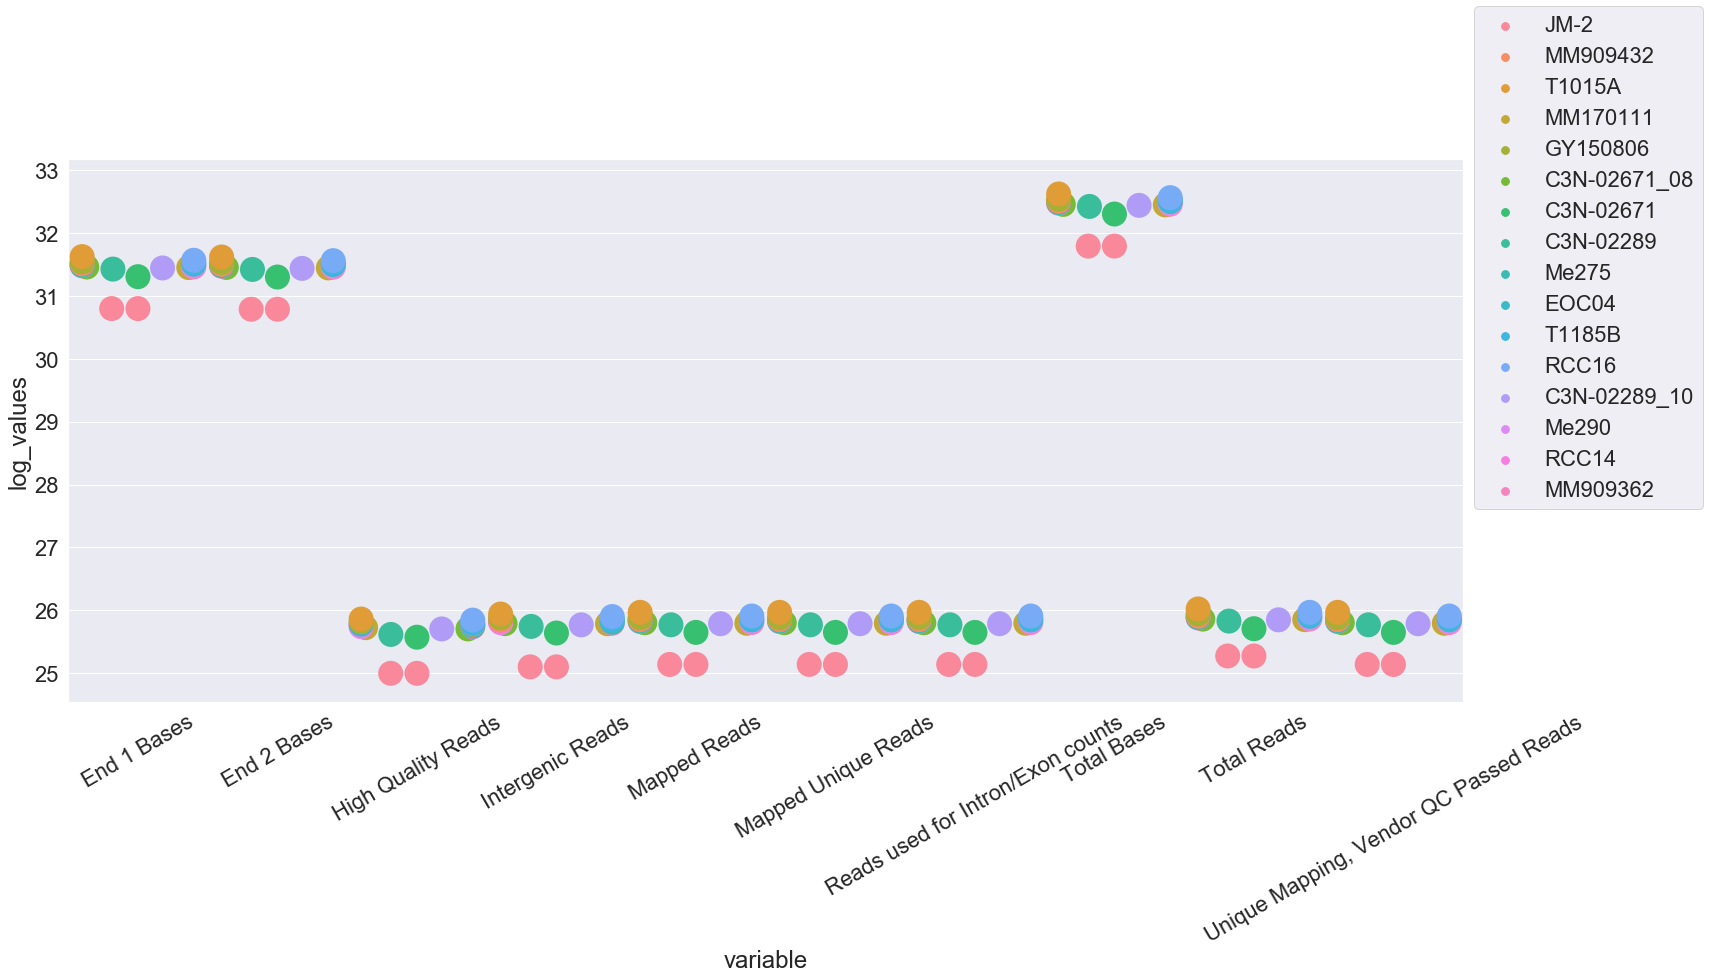

In [366]:
sns.set(rc={'figure.figsize':(25,10)})
#sns.set_context("paper", rc={"font.size":20,"axes.titlesize":10,"axes.labelsize":10}) 
sns.set(font_scale=2)
ax = sns.swarmplot(x="variable", y="log_values", hue="samples", data=merged_long_melt_top,size=25)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3))
ax.set_xticklabels(ax.get_xticklabels(minor=False), rotation=30)